### =====================================================================
### IMPORTACIÓN GENERAL DE LA INFORMACIÓN.
### =====================================================================

In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import descartes
import geopandas as gpd
import json
import requests
import geocoder

from sklearn.ensemble import RandomForestRegressor
from shapely.geometry import Point, Polygon
from urllib2 import urlopen

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

### =====================================================================
### ALGORITMOS DE MACHINE LEARNING:
### =====================================================================

In [2]:
# LECTURAS DE CSV YA PROCESADOS. 
train = pd.read_csv('DATA/train_procesado.csv') # trainProcesado_precio_v2.csv # train.csv
test = pd.read_csv('DATA/test_procesado.csv') # testProcesado_v2.csv # test.csv

In [3]:
Identificador = pd.DataFrame()
Identificador['id'] = test['id']

In [4]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

train = train.drop('mean_2016', axis = 1)
test = test.drop('mean_2016', axis = 1)

train = train.drop('median_2016', axis = 1)
test = test.drop('median_2016', axis = 1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Columns: 187 entries, habitaciones to mean_2016_agrupado_9
dtypes: int64(187)
memory usage: 342.4 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 186 entries, habitaciones to mean_2016_agrupado_9
dtypes: int64(186)
memory usage: 85.1 MB


### =====================================================================
### RANDOM FOREST.
### =====================================================================

In [7]:
# Segmentamos una parte para entrenar y constatar.
train_2016 = train.loc[train['2016'] == 1]
train_PREV = train.loc[train['2016'] == 0]

In [8]:
# Label a predecir.
labels_2016 = np.array(train_2016['precio'])
labels_PREV = np.array(train_PREV['precio'])

In [9]:
# Resto de los labels.
train_2016 = train_2016.drop('precio', axis = 1)
train_PREV = train_PREV.drop('precio', axis = 1)
#train_2016 = train_2016.drop('anio', axis = 1)
#train_PREV = train_PREV.drop('anio', axis = 1)
#test = test.drop('anio', axis = 1)

In [10]:
# Lista de columnas.
feature_list = list(train_PREV.columns)

In [11]:
# Numpy array
train_2016 = np.array(train_2016)
train_PREV = np.array(train_PREV)

In [12]:
# Observamos lo que nos queda en cada parte.
print('Training Features Shape:', train_PREV.shape)
print('Training Labels Shape:', labels_PREV.shape)
print('Testing Features Shape:', train_2016.shape)
print('Testing Labels Shape:', labels_2016.shape)

('Training Features Shape:', (145962, 186))
('Training Labels Shape:', (145962,))
('Testing Features Shape:', (94038, 186))
('Testing Labels Shape:', (94038,))


In [13]:
# Armamos el regresor con parámetros por defecto.
rf = RandomForestRegressor(n_estimators = 300, random_state = 150)
# Entrenamos.
rf.fit(train_PREV, labels_PREV)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=150, verbose=0, warm_start=False)

In [14]:
# Hacemos una predicción.
predictions = rf.predict(train_2016)
# Calculamos el error absoluto.
errors = abs(predictions - labels_2016)
# Imprimimos el error.
print('Error:', round(np.mean(errors), 2), 'grados.')

('Error:', 600753.6, 'grados.')


In [15]:
# Calculamos el porcentaje de error.
mape = 100 * (errors / labels_2016)
# Calculate la precisión.
accuracy = 100 - np.mean(mape)
print('Precision:', round(accuracy, 2), '%.')

('Precision:', 78.0, '%.')


In [16]:
prediccion = rf.predict(test)

In [17]:
train = train.drop('precio', axis = 1)

In [18]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = train.columns, columns=['importance']).sort_values('importance',ascending=False)

In [19]:
feature_importances

,importance
banos,1.831088e-01
mean_2016_agrupado_1,7.023693e-02
mean_2016_agrupado_5,6.067798e-02
mean_2016_agrupado_4,5.637053e-02
mean_2016_agrupado_2,5.327273e-02
DISTRITO FEDERAL,5.299672e-02
mean_2016_agrupado_0,4.299327e-02
mean_2016_agrupado_3,3.901657e-02
mean_2016_agrupado_6,2.789112e-02
mean_2016_agrupado_22,2.600395e-02


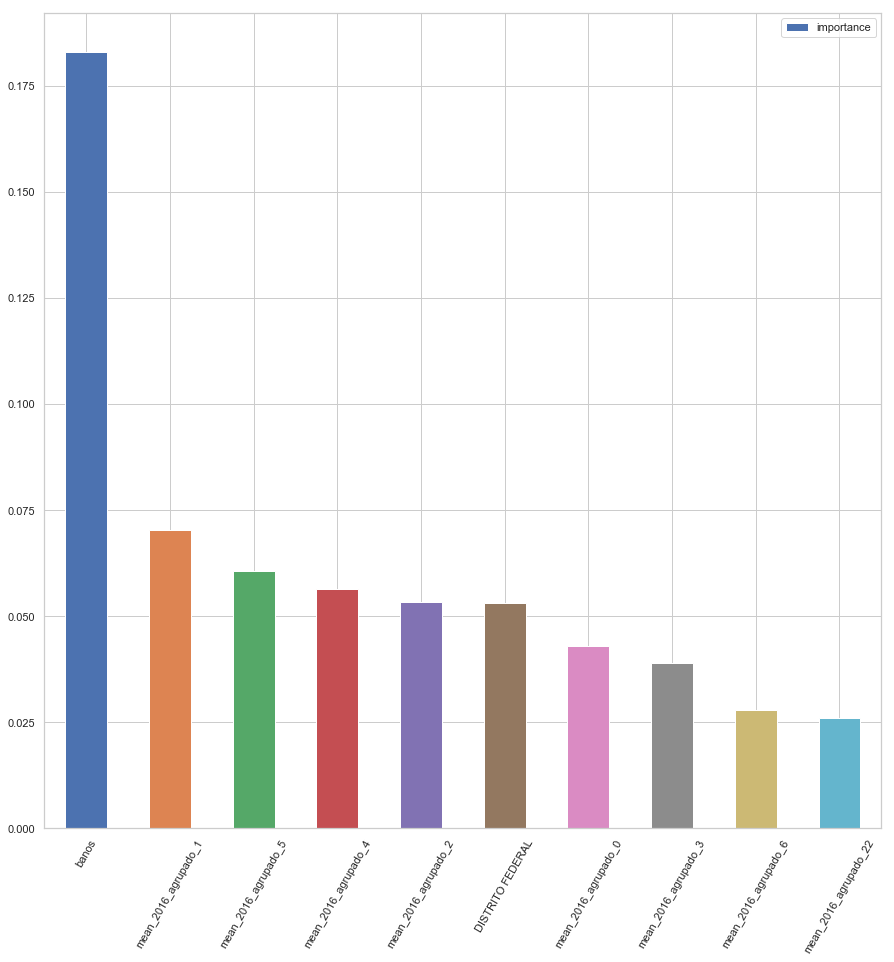

In [20]:
ax = feature_importances.head(10).plot.bar(y='importance', rot=60, figsize=(15,15))

In [21]:
## =================================================================================================
## ARMAMOS EN BASE A LA PREDICCIÓN QUE TENEMOS UN CSV PARA SUBIR A KAGGLE CON EL FORMATO INDICADO!
## =================================================================================================
submission = pd.DataFrame({ 'id': Identificador['id'], 'target': prediccion })
submission.to_csv("SUBMITS/012_G34_PrecioAgrupado_RF_02.csv", index=False)